<a href="https://colab.research.google.com/github/beanie00/2022-EE538-HW/blob/main/EE538_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

'Homework 4 Problem 3'의 데이터는 Homework3의 데이터와 특징이 다르다. Homework3의 데이터는 서로 겹치는 부분이 있고 서로 바로 옆에 배치되었다면 Homework 4의 데이터는 겹치는 부분은 없지만 나선 모양으로 복잡하게 구성되어 있다. 이런 데이터 특성 때문에 Homework 4의 데이터는 선형 경계로는 데이터 특성을 충분히 반영하지 못한다. 따라서 multi-layer perceptron을 이용하여 수많은 선형 경계들의 조합으로 새롭게 결정 경계를 만들어야 한다.

- 먼저 Homework 4의 데이터를 다시 생성하자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pandas as pd
import math

def makeSample_prob3(S, T):
  N1 = 500
  N2 = 500
  X_1, X_2, Y_1, Y_2 = [[], [], [], []]
  fig, ax = plt.subplots()

  while (len(X_1) < N1 or len(X_2) < N2):
    if (len(X_1) < N1):
      x1 = np.random.uniform(-20, 20)
      y1 = np.random.uniform(-20, 20)
      if (y1 > 0 and (x1+4)**2+y1**2 > 36 and (x1+4)**2+y1**2 < 100):
        X_1.append(x1)
        Y_1.append(y1)
        S.append([x1, y1])
        T.append(0)
    if (len(X_2) < N2):
      x2 = np.random.uniform(-20, 20)
      y2 = np.random.uniform(-20, 20)
      if (y2 < 3 and (x2-4)**2+(y2-3)**2 > 36 and (x2-4)**2+(y2-3)**2 < 100):
        X_2.append(x2)
        Y_2.append(y2)
        S.append([x2, y2])
        T.append(1)

  ax.scatter(X_1,Y_1, color='red', alpha=0.1)
  ax.scatter(X_2,Y_2, color='blue', alpha=0.1)
  ax.grid(True)
  plt.title("Samples for prob 3")
  plt.show()
  return [X_1, X_2, Y_1, Y_2]

- 학습에 사용할 다양한 activation function을 정의해주었다.

In [ ]:
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

- 데이터에 랜덤성을 부여하기 위하여 shuffle 함수를 구현하였다.

In [ ]:
def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]

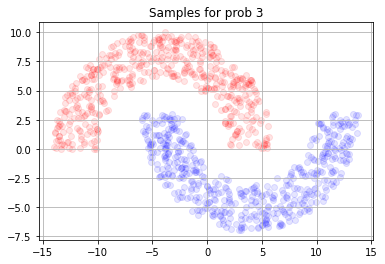

In [ ]:
S = []
Target = []
XY = makeSample_prob3(S, Target)

In [ ]:
X, y = shuffle_data(np.array(S), np.array(Target))

# (3.b)

Single layer perceptron으로 서로 다른 3개의 initialization에 대하여 결정경계를 계산하고 plot 하였다. 예상하였듯이 선형의 결정경계가 생성됨을 확인할 수 있다.

In [ ]:
def SingleLayerPerceptron_train(X_train, Y_train, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt

    wOut = 2*np.random.rand(X_train.shape[1]) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []
    epoch_loss = []

    # Start looping over the passengers, i.e. over I.
    for n in range(0, 100):
      vec_y = []
      for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
      
          # 1: input the data 
          x = X_train[I]
      
          # 2: Start the algorithm
      
          # 2.1: Feed forward
          y = sigmoid_act(np.dot(wOut, x) + bOut) # Output of the Output layer

      
          #2.2: Compute the output layer's error
          delta_Out = 1/2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
      
          # 3: Gradient descent 
          wOut = wOut - eta*delta_Out*x  # Outer Layer
          bOut = bOut - eta*delta_Out
      
          # 4. Computation of the loss function
          mu.append((y-Y_train[I])**2)
          vec_y.append(mu)

      epoch_loss.append(np.mean(mu))
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(epoch_loss)+1), epoch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    return wOut, bOut, mu

In [ ]:
def SingleLayerPerceptron_pred(X_test, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): 
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        y = sigmoid_act(np.dot(wOut, x) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

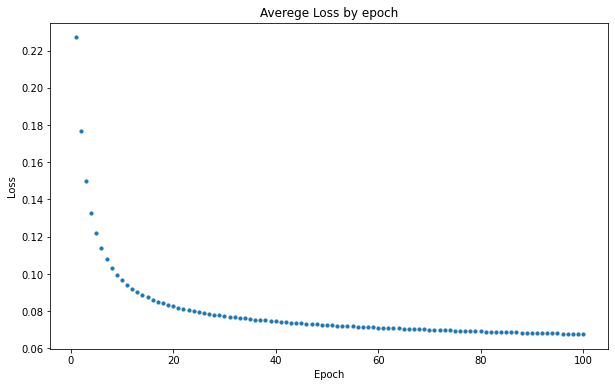

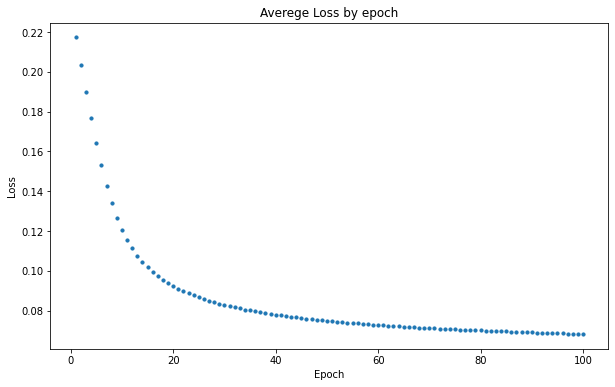

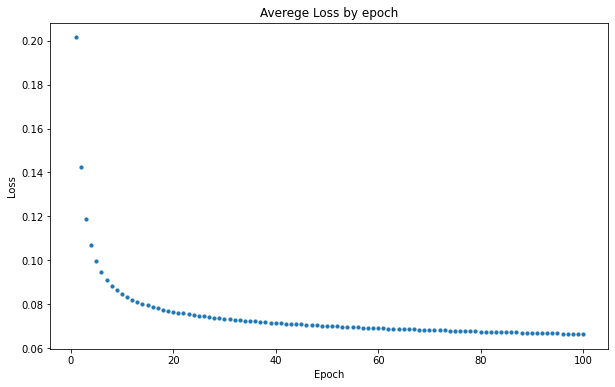

In [ ]:
wOut_1, bOut_1, mu_1 = SingleLayerPerceptron_train(X, y, eta=0.0015)
wOut_2, bOut_2, mu_2 = SingleLayerPerceptron_train(X, y, eta=0.0015)
wOut_3, bOut_3, mu_3 = SingleLayerPerceptron_train(X, y, eta=0.0015)

In [ ]:
X_test = np.random.randn(500000, 2)*15
predictions_1 = SingleLayerPerceptron_pred(X_test, wOut_1, bOut_1, mu_1)
predictions_2 = SingleLayerPerceptron_pred(X_test, wOut_2, bOut_2, mu_2)
predictions_3 = SingleLayerPerceptron_pred(X_test, wOut_3, bOut_3, mu_3)

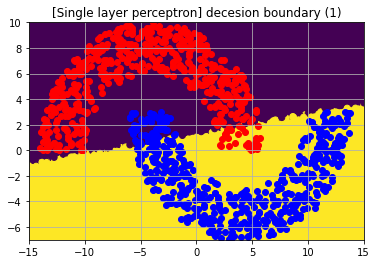

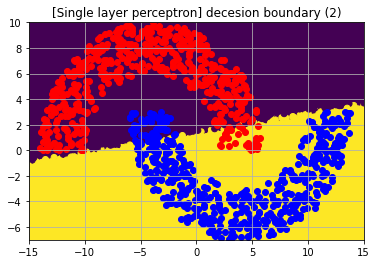

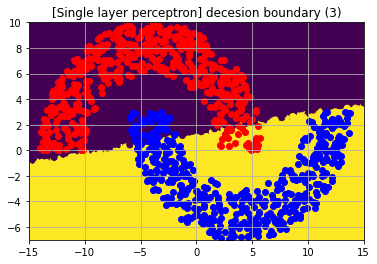

In [ ]:
[X_1, X_2, Y_1, Y_2] = XY

# first try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_1)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Single layer perceptron] decesion boundary (1)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# second try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_2)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Single layer perceptron] decesion boundary (2)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# third try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_3)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Single layer perceptron] decesion boundary (3)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)

plt.show()

# (3.d)

3개의 hidden neuron으로 이루어진 한 개의 hidden layer을 가진 모델에 대하여, 3개의 initialization으로 결정경계를 계산하고 plot 하였다. 예상하였듯이 2개의 선의 조합으로 결정경계가 생성됨을 볼 수 있다. 또한 initialization에 따라 선의 기울기가 달라짐을 확인할 수 있다.

In [ ]:
def TwoLayerPerceptron_train(X_train, Y_train, p=20, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    wOut = 2*np.random.rand(p) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []
    epoch_loss = []

    for n in range(0, 100):
      vec_y = []
      for I in range(0, X_train.shape[0]-1): 
      
          # 1: input the data 
          x = X_train[I]
      
          # 2: Start the algorithm
      
          # 2.1: Feed forward
          z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
          y = sigmoid_act(np.dot(wOut, z1) + bOut) # Output of the Output layer

      
          #2.2: Compute the output layer's error
          delta_Out = 1/2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
      
          #2.3: Backpropagate
          delta_1 = delta_Out * wOut * ReLU_act(z1, der=True) # Hidden Layer Error
      
          # 3: Gradient descent 
          wOut = wOut - eta*delta_Out*z1  # Outer Layer
          bOut = bOut - eta*delta_Out
      
          w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
          b1 = b1 - eta*delta_1
      
          # 4. Computation of the loss function
          mu.append((y-Y_train[I])**2)

      epoch_loss.append(np.mean(mu))
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(epoch_loss)+1), epoch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    return w1, b1, wOut, bOut, mu

In [ ]:
def TwoLayerPerceptron_pred(X_test, w1, b1, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]):
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        y = sigmoid_act(np.dot(wOut, z1) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

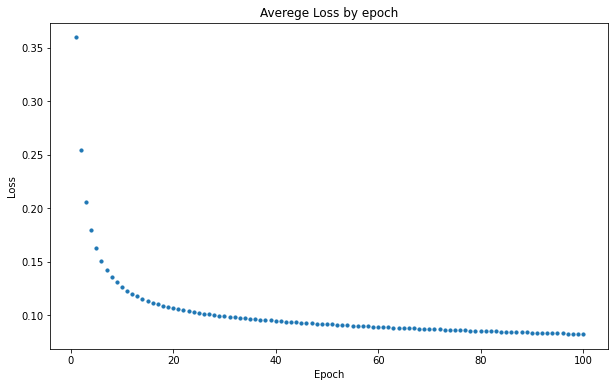

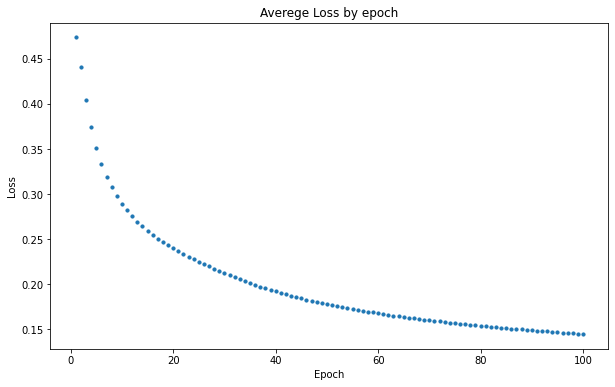

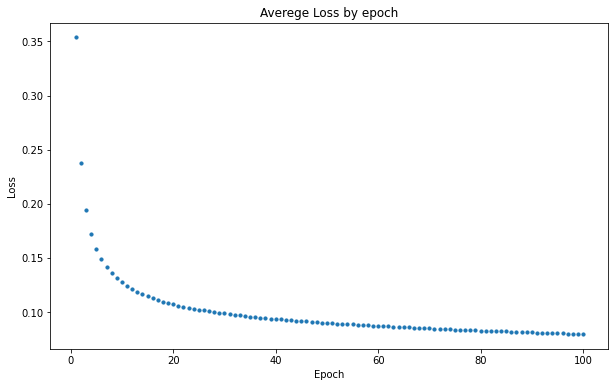

In [ ]:
w1_1, b1_1, wOut_1, bOut_1, mu_1 = TwoLayerPerceptron_train(X, y, p=3, eta=0.0015)
w1_2, b1_2, wOut_2, bOut_2, mu_2 = TwoLayerPerceptron_train(X, y, p=3, eta=0.0015)
w1_3, b1_3, wOut_3, bOut_3, mu_3 = TwoLayerPerceptron_train(X, y, p=3, eta=0.0015)

In [ ]:
X_test = np.random.randn(100000, 2)*15
predictions_1 = TwoLayerPerceptron_pred(X_test, w1_1, b1_1, wOut_1, bOut_1, mu_1)
predictions_2 = TwoLayerPerceptron_pred(X_test, w1_2, b1_2, wOut_2, bOut_2, mu_2)
predictions_3 = TwoLayerPerceptron_pred(X_test, w1_3, b1_3, wOut_3, bOut_3, mu_3)

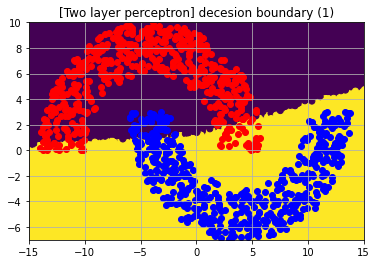

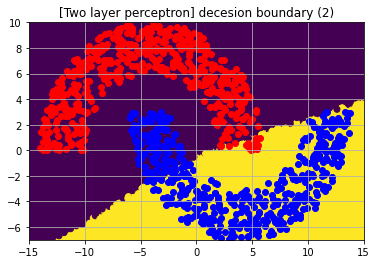

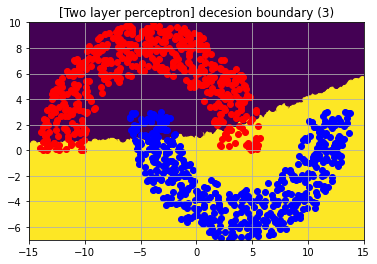

In [ ]:
[X_1, X_2, Y_1, Y_2] = XY

# first try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_1)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Two layer perceptron] decesion boundary (1)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# second try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_2)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Two layer perceptron] decesion boundary (2)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# third try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_3)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Two layer perceptron] decesion boundary (3)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# (3.f)

2개의 hidden layer을 가진 모델에 대하여, 3개의 initialization으로 결정경계를 계산하고 plot 하였다. 이전보다 더 많은 선의 조합으로 결정경계가 이루어짐을 볼 수 있고 initialization에 따라 선들의 기울기가 달라진다.

In [ ]:
def ThreeLayerPerceptron_train(X_train, Y_train, p=20, q=10, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []
    epoch_loss = []

    for n in range(0, 300):
      vec_y = []
      for I in range(0, X_train.shape[0]-1): 
      
          # 1: input the data 
          x = X_train[I]
      
          # 2: Start the algorithm
      
          # 2.1: Feed forward
          z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
          z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
          y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer

      
          #2.2: Compute the output layer's error
          delta_Out = 1/2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
      
          #2.3: Backpropagate
          delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
          delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
      
          # 3: Gradient descent 
          wOut = wOut - eta*delta_Out*z2  # Outer Layer
          bOut = bOut - eta*delta_Out
      
          w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
          b2 = b2 -  eta*delta_2
      
          w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
          b1 = b1 - eta*delta_1
      
          # 4. Computation of the loss function
          mu.append((y-Y_train[I])**2)

      epoch_loss.append(np.mean(mu))
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(epoch_loss)+1), epoch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

In [ ]:
def ThreeLayerPerceptron_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): 
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

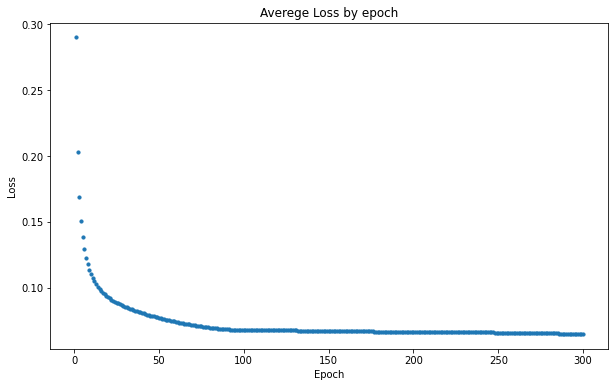

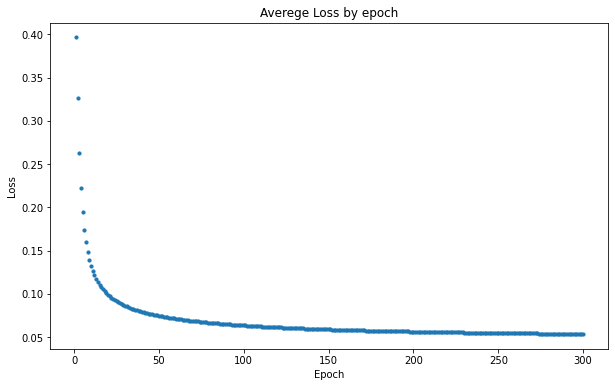

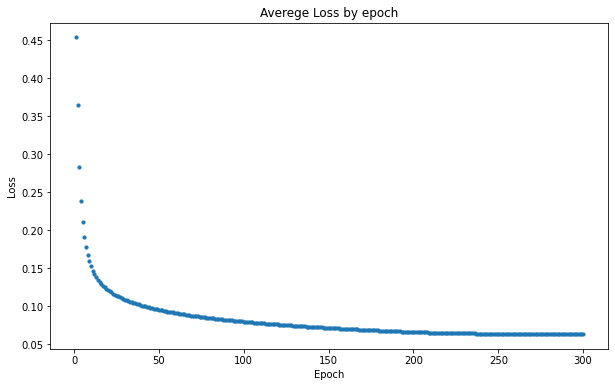

In [ ]:
w1_1, b1_1, w2_1, b2_1, wOut_1, bOut_1, mu_1 = ThreeLayerPerceptron_train(X, y, p=4, q=4, eta=0.0015)
w1_2, b1_2, w2_2, b2_2, wOut_2, bOut_2, mu_2 = ThreeLayerPerceptron_train(X, y, p=4, q=4, eta=0.0015)
w1_3, b1_3, w2_3, b2_3, wOut_3, bOu_3t, mu_3 = ThreeLayerPerceptron_train(X, y, p=4, q=4, eta=0.0015)

In [ ]:
X_test = np.random.randn(100000, 2)*15
predictions_1 = ThreeLayerPerceptron_pred(X_test, w1_1, b1_1, w2_1, b2_1, wOut_1, bOut_1, mu_1)
predictions_2 = ThreeLayerPerceptron_pred(X_test, w1_2, b1_2, w2_2, b2_2, wOut_2, bOut_2, mu_2)
predictions_3 = ThreeLayerPerceptron_pred(X_test, w1_3, b1_3, w2_3, b2_3, wOut_3, bOut_3, mu_3)

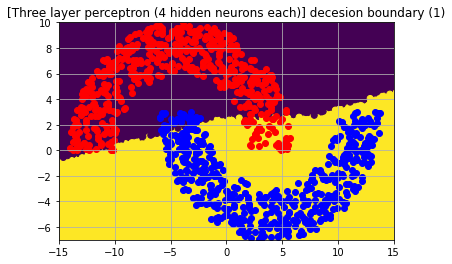

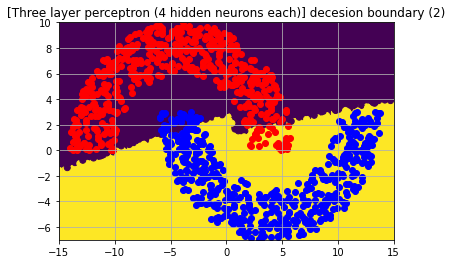

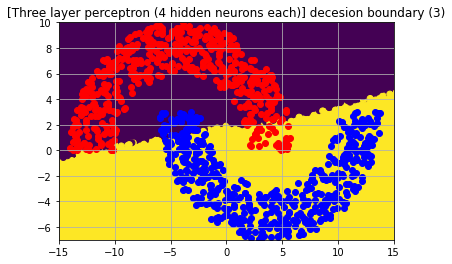

In [ ]:
[X_1, X_2, Y_1, Y_2] = XY

# first try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_1)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (4 hidden neurons each)] decesion boundary (1)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# second try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_2)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (4 hidden neurons each)] decesion boundary (2)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# third try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_3)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (4 hidden neurons each)] decesion boundary (3)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# (3.h)

더 많은 hidden neuron을 가진 2개의 hidden layer으로 이루어진 모델에 대하여, 3개의 initialization으로 결정경계를 계산하고 plot 하였다. 이전보다 더 많은 선의 조합으로, 복잡한 데이터 특성을 잘 반영하여 결정경계가 생성되었다. 마찬가지로 initialization에 따라 결정경계를 이루는 선들의 기울기가 달라진다.

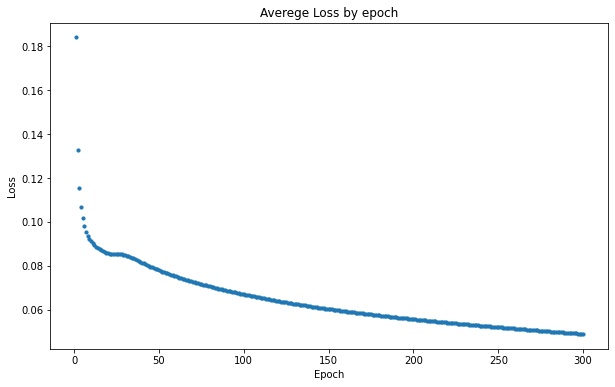

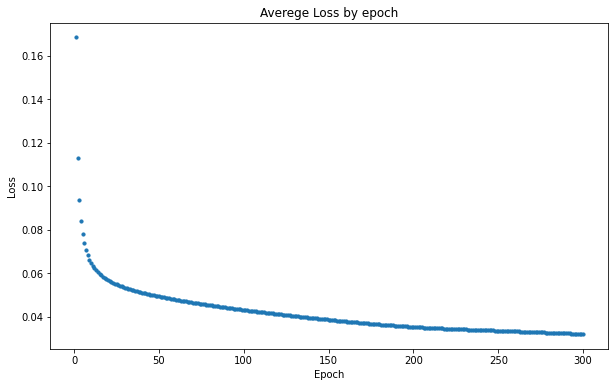

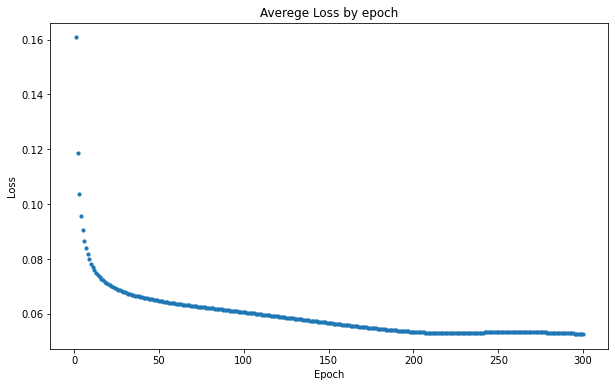

In [ ]:
w1_1, b1_1, w2_1, b2_1, wOut_1, bOut_1, mu_1 = ThreeLayerPerceptron_train(X, y, p=20, q=10, eta=0.0015)
w1_2, b1_2, w2_2, b2_2, wOut_2, bOut_2, mu_2 = ThreeLayerPerceptron_train(X, y, p=20, q=10, eta=0.0015)
w1_3, b1_3, w2_3, b2_3, wOut_3, bOu_3t, mu_3 = ThreeLayerPerceptron_train(X, y, p=20, q=10, eta=0.0015)

In [ ]:
X_test = np.random.randn(100000, 2)*15
predictions_1 = ThreeLayerPerceptron_pred(X_test, w1_1, b1_1, w2_1, b2_1, wOut_1, bOut_1, mu_1)
predictions_2 = ThreeLayerPerceptron_pred(X_test, w1_2, b1_2, w2_2, b2_2, wOut_2, bOut_2, mu_2)
predictions_3 = ThreeLayerPerceptron_pred(X_test, w1_3, b1_3, w2_3, b2_3, wOut_3, bOut_3, mu_3)

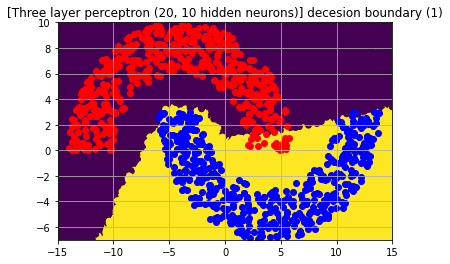

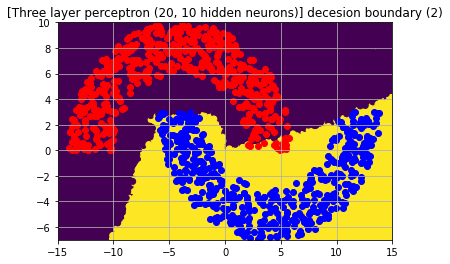

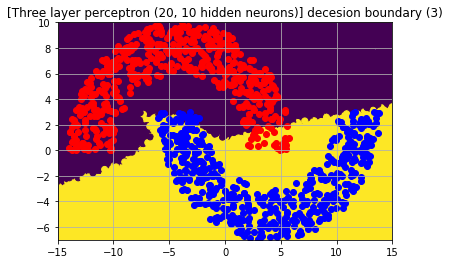

In [ ]:
[X_1, X_2, Y_1, Y_2] = XY

# first try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_1)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (20, 10 hidden neurons)] decesion boundary (1)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# second try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_2)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (20, 10 hidden neurons)] decesion boundary (2)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()

# third try
plt.scatter(X_test.T[0], X_test.T[1], c=predictions_3)

plt.scatter(X_1,Y_1, color='red', alpha=1)
plt.scatter(X_2,Y_2, color='blue', alpha=1)
           
plt.grid(True)
plt.title("[Three layer perceptron (20, 10 hidden neurons)] decesion boundary (3)")
plt.xlim(-15, 15)
plt.ylim(-7, 10)
plt.show()